# Vizualiztion with Matplotlib

Matplotlib is a multi-platform data visualization library built on NumPy arrays, and designed to work with the broader SciPy stack. 

## Importing Matplotlib

Just as we use the `np` shorthand for NumPy and the `pd` shorthand for Pandas, we will use soeme standard shorthands for Matplotlib imports:

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

THe `plt` interface is what we will use most often, as we shall see throughout this chapter.

## Setting Styles

We will use the `plt.style` directive to choose appropriate aesthetic styles for our figures. Here we will set the `classic` style, which ensures that the plots we create use the classic Matplotlib style:

In [2]:
plt.style.use('classic')

### `show()` **or No** `show()`**? How to Display Your Plots**

The best use of Matplotlib differs depending on how you are using it; roughly, the three applicable contexts are using Matplotlib in a script, in an IPython terminal, or in an IPython notebook.

### Plotting from a script

If we are using Matplotlib from within a script, the function `plt.show()` is our friend. 

`plt.show()` starts an event loop, looks for all currently active figure objects, and opens one or more interactive windows that display our figure or figures.

```python
# ------- file: myplot.py ------
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

plt.show()
```

**NOTE**: that the `plt.show()` command should be used only once per Python session, and is most often seen at the very end of the script. Multiple `show()` commands can lead to unpredictable backend-dependent behavior, and should mostly be avoided.

### Plotting from an IPython Shell

IPython is built to work well with Matplotlib if we specify Matplotlib mode. To enable this mode, we can use the `%matplotlib` magic command after starting `ipython`:

```python
ipython
In [1]: %matplotlib
Using matplotlib backend: TkAgg

In [2]: import matplotlib.pyplot as plt
```

At this point, any `plt` plot command will cause a figure window to open, and further commands can be run to update the plot. Some changes (such as modifying properties of lines that are already drawn) will not draw automatically: to force an update, we will use `plt.draw()`. Using `plt.show()` in Matplotlib mode is not required.

### Plotting from an IPython notebook

* `%matplotlib notebook` will lead to interactive plots embedded within the notebook
* `%matplotlib inline` will lead to static images of your plot embedded in the notebook


After running `%matplotlib inline` command (it needs to be done only once per kernel/session), any cell within the notebook that creates a plot will embed a PNG image of the resulting graphic:

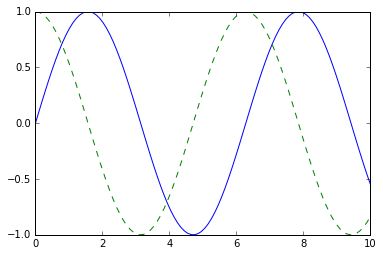

In [3]:
%matplotlib inline
import numpy as np
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

## Saving Figures to File

One nice feature of Matplotlib is the ability to save figures in a wide variety of formats. Saving a figure can be done using the `savefig()` command. For example, to save the previous figure as a PNG file, we can run this:

In [4]:
# Save fig in current working dir
fig.savefig('my_figure.png')

# Search for the image we just saved
!dir /s "my_figure.png"

 Volume in drive C has no label.
 Volume Serial Number is AC2D-8259

 Directory of C:\Users\Batakrishna\Desktop\100DaysOfMLCode\22. Matplotlib - Intro

29-Jul-18  12:22 PM            26,306 my_figure.png
               1 File(s)         26,306 bytes

     Total Files Listed:
               1 File(s)         26,306 bytes
               0 Dir(s)  57,422,962,688 bytes free


To confirm that it contains what we think it contains, let's use the IPython `Image` object to display the contents of this file:

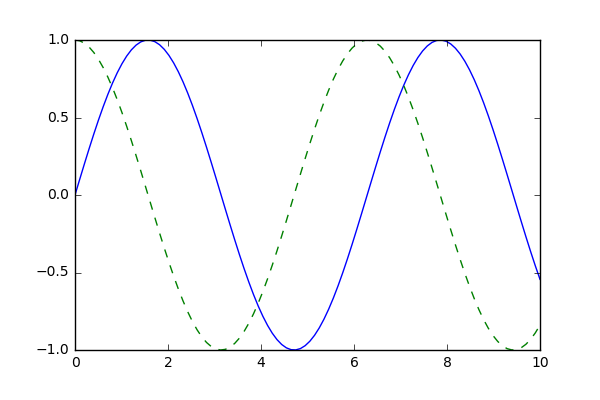

In [5]:
from IPython.display import Image
Image('my_figure.png')

List of supported file types:

In [6]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpeg': 'Joint Photographic Experts Group',
 'jpg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

## MATLAB-style Interface

Matplotlib was originally written as a Python alternative for MATLAB users, and much of its syntax reflects that fact. The MATLAB-style tools are contained in the pyplot (`plt`) interface. For example, the following code will probably look quite familiar to MATLAB users:

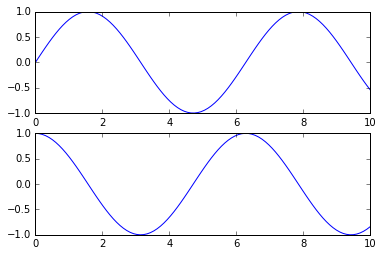

In [7]:
plt.figure() # create a plot figure

# create the first of the two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

It is important to note that this interface is stateful: it keeps track of the "current" figure and axes, which are where all plt commands are applied. We can get a reference to these using the `plt.gcf()` (get current figure) and `plt.gca()` (get current axes) routines.

While this stateful interface is fast and convenient for simple plots, it is easy to run into problems. For example, once the second panel is created, how can we go back and add something to the first? This is possible within the MATLAB-style interface, but a bit clunky. Fortunately, there is a better way.

### Object-oriented interface

 Rather than depending on some notion of an "active" figure or axes, in the object-oriented interface the plotting functions are methods of explicit `Figure` and `Axes` objects. To re-create the previous plot using this style of plotting, you might do the following:

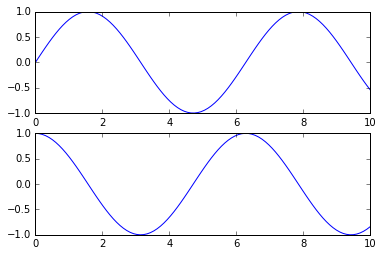

In [8]:
# First create az grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));